In [1]:
# Necessary Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Download the cvs file
#Read the csv, notice sep=','.. For CSV files created in Norwegian excel we need to use sep=';'#
#df = pd.read_csv(url, na_values=' ') we can use this for automatically convert blank space to nan values
ruter_data = r"C:\Users\berry\OneDrive - OsloMet\Lab-Introduksjon-til-kunstlig-intelligens\Assignment-2\Ruter-data-1.csv"
df = pd.read_csv(ruter_data, sep=";")

In [3]:
# Preliminary Data Exploration
print(df.head())
print(df.isnull().sum())

                             TurId        Dato  Fylke Område Kommune  \
0  15006-2020-08-10T10:24:00+02:00  10/08/2020  Viken   Vest   Bærum   
1  15002-2020-08-15T12:54:00+02:00  15/08/2020  Viken   Vest   Bærum   
2  15004-2020-08-03T09:54:00+02:00  03/08/2020  Viken   Vest   Bærum   
3  15003-2020-07-27T13:00:00+02:00  27/07/2020  Viken   Vest   Bærum   
4  15002-2020-08-27T07:15:00+02:00  27/08/2020  Viken   Vest   Bærum   

                  Holdeplass_Fra                        Holdeplass_Til  \
0                    Nordliveien                             Tjernsmyr   
1               Nadderud stadion  Bekkestua bussterminal (Plattform C)   
2               Ringstabekkveien                               Skallum   
3                      Gruvemyra                              Gullhaug   
4  Lysaker stasjon (Plattform A)                             Tjernsmyr   

  Linjetype Linjefylke Linjenavn  Linjeretning  \
0     Lokal      Viken       150             0   
1     Lokal      Viken

In [4]:
# Data Preprocessing

# 1. Address Negative Passenger Counts
df['Passasjerer_Ombord'] = df['Passasjerer_Ombord'].apply(lambda x: max(0, x))

In [5]:
# 2. Feature Engineering
# Extract Day of the Week and Month from the 'Dato' column
df['Dato'] = pd.to_datetime(df['Dato'], format='%d/%m/%Y')
df['Day_of_Week'] = df['Dato'].dt.dayofweek
df['Month'] = df['Dato'].dt.month
df['Year'] = df['Dato'].dt.year  # Extracting Year

In [6]:
# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(df[['Linjetype', 'Linjenavn', 'Linjeretning']], drop_first=True)
df = pd.concat([df, encoded_data], axis=1)

In [7]:
# Model Building

# Features and target variable selection
X = df.drop(columns=['TurId', 'Dato', 'Fylke', 'Område', 'Kommune', 'Holdeplass_Fra', 'Holdeplass_Til',
                             'Linjetype', 'Linjefylke', 'Linjenavn', 'Linjeretning',
                             'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra',
                             'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra',
                             'Passasjerer_Ombord'])
y = df['Passasjerer_Ombord']

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
cols_to_scale = X.columns.difference(['Day_of_Week', 'Month', 'Year'])
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


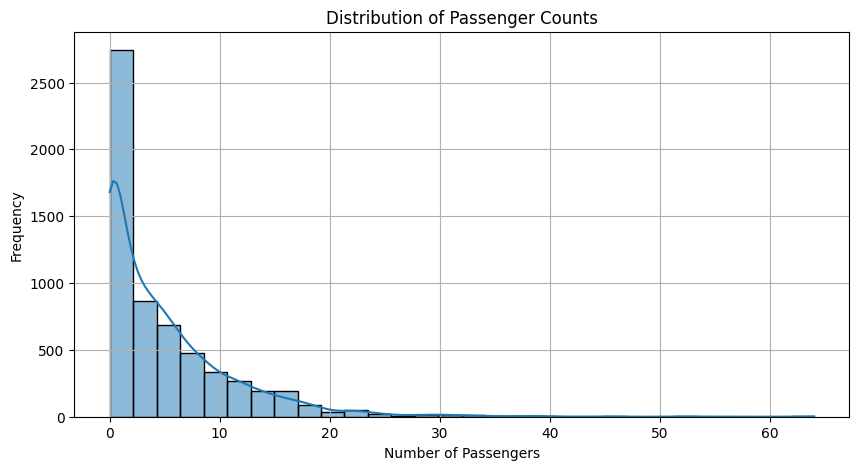

In [9]:
# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

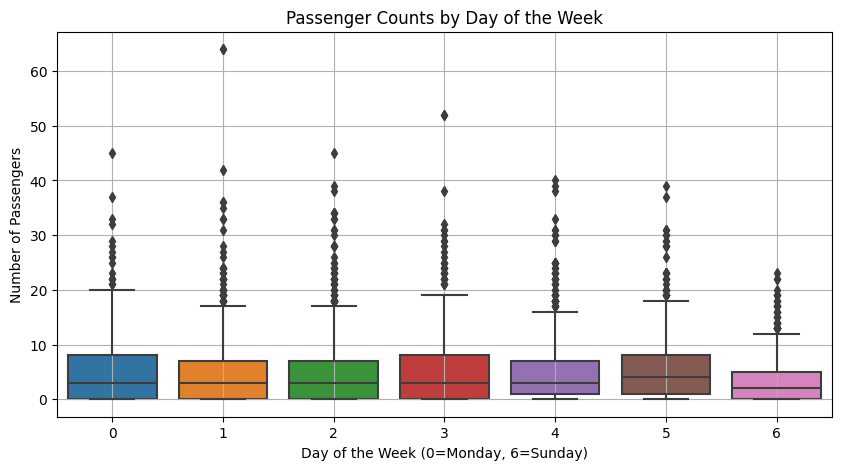

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Day_of_Week'], y=y)
plt.title('Passenger Counts by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\berry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

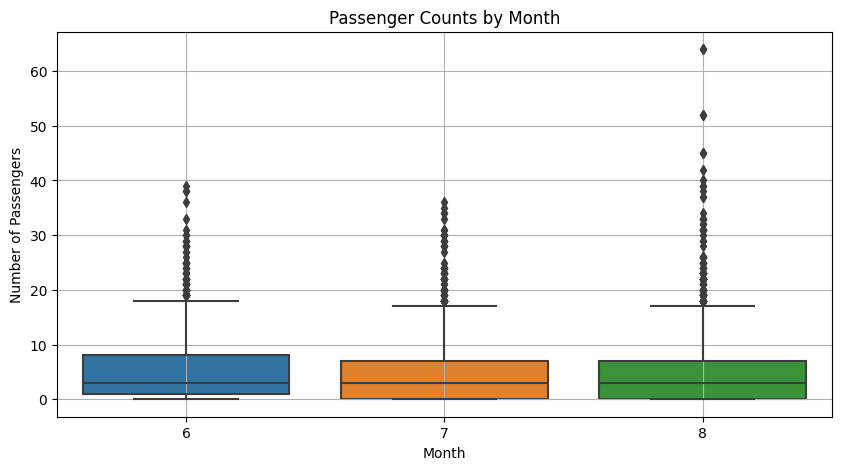

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Month'], y=y)
plt.title('Passenger Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [12]:
# Ridge Regression
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_cv_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)
ridge_predictions = ridge_cv_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f"Ridge Regression Test RMSE: {ridge_rmse}")
print(f"Ridge Regression Test R^2 Score: {ridge_r2}")

Ridge Regression Test RMSE: 5.927706902132234
Ridge Regression Test R^2 Score: 0.04565388390936498


In [13]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"\nRandom Forest Regression Test RMSE: {rf_rmse}")
print(f"Random Forest Regression Test R^2 Score: {rf_r2}")


Random Forest Regression Test RMSE: 6.4118268004806325
Random Forest Regression Test R^2 Score: -0.11659590821267773


In [14]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"\nGradient Boosting Regression Test RMSE: {gb_rmse}")
print(f"Gradient Boosting Regression Test R^2 Score: {gb_r2}")


Gradient Boosting Regression Test RMSE: 5.944124133365554
Gradient Boosting Regression Test R^2 Score: 0.04036029649329298


In [15]:
# Function to predict passenger count for a specific date
def predict_passenger_count(date, model=rf_model):
    # Convert date to datetime object
    date = pd.to_datetime(date, format='%d/%m/%Y')
    
    # Create a sample input with all features set to their mean values
    sample_input = X_train.mean().to_frame().T
    # Note: We're using X_train.mean() to ensure alignment with the columns of the trained model
    
    # Set the day of the week, month and year for the input date
    sample_input['Day_of_Week'] = date.dayofweek
    sample_input['Month'] = date.month
    sample_input['Year'] = date.year
    
    # Make prediction
    predicted_passenger_count = model.predict(sample_input)
    return predicted_passenger_count[0]

In [16]:
# Example of using the prediction function
example_date = '15/10/2023'
predicted_passengers = predict_passenger_count(example_date)
print(f"\nPredicted passengers for {example_date}: {predicted_passengers}")


Predicted passengers for 15/10/2023: 1.8961489898989903


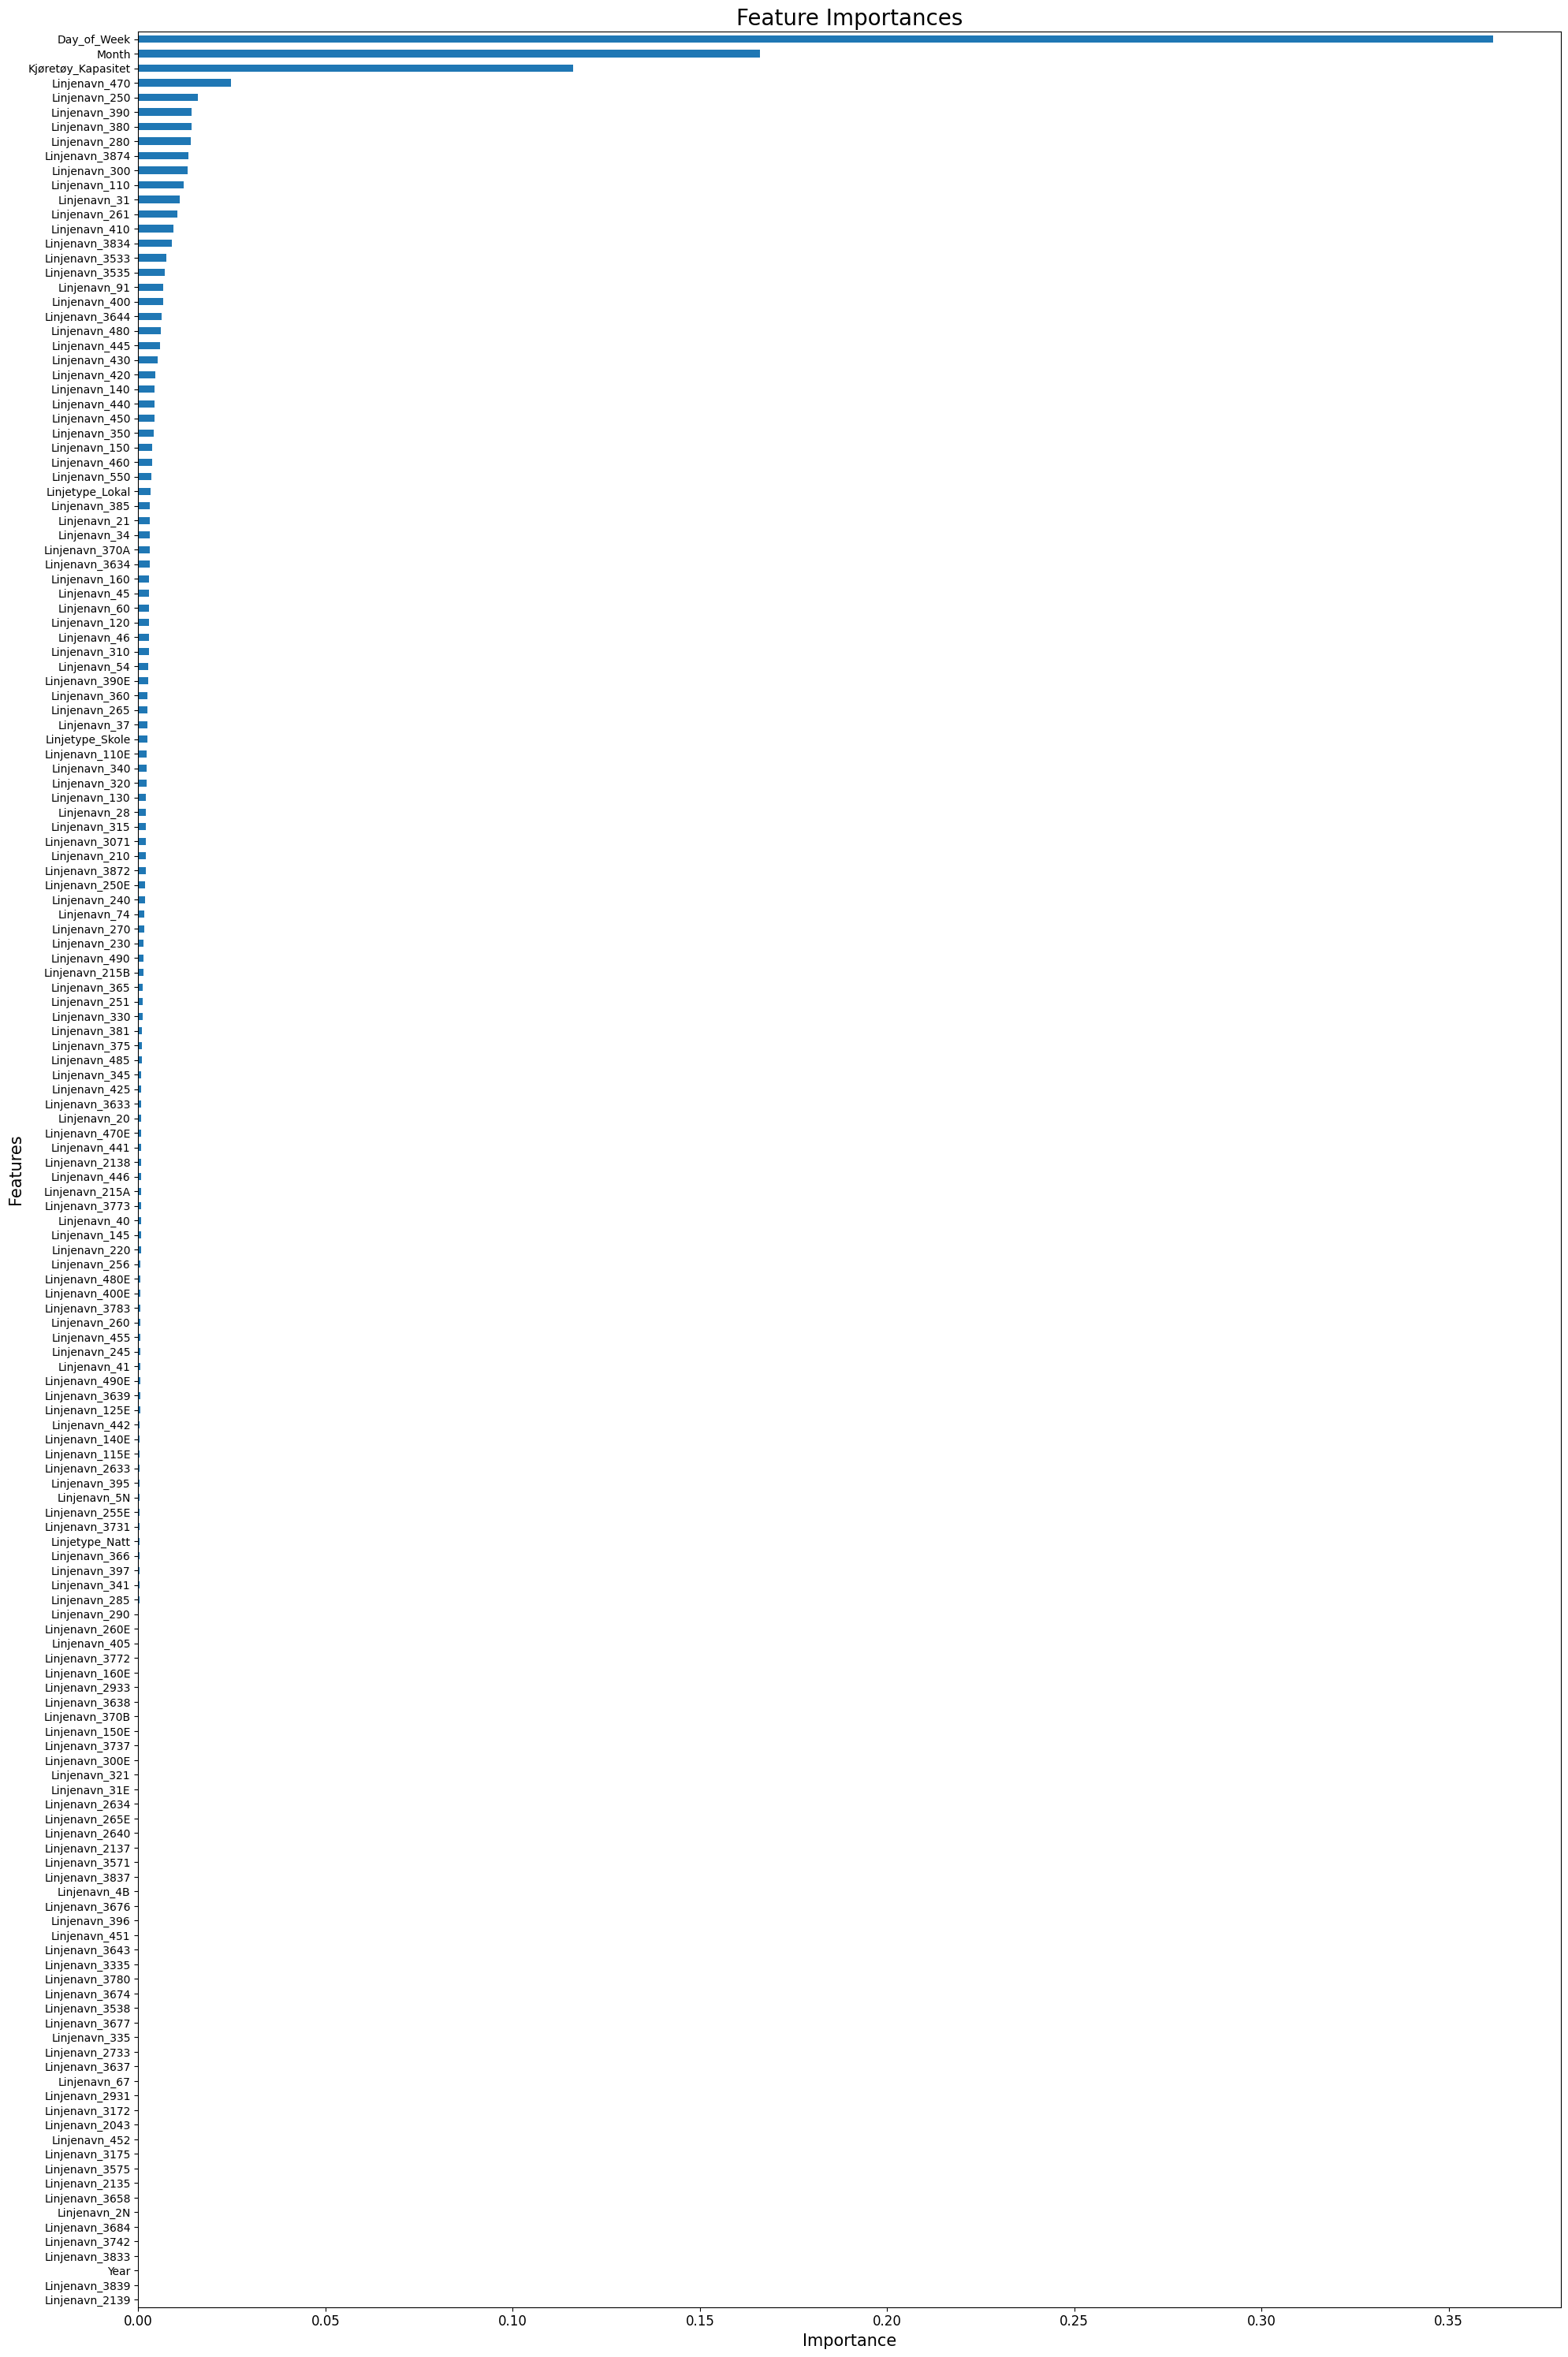

In [17]:
# Feature Importance Visualization
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values()

# Optional: Display only the top N features
# N = 20
# importances_sorted = importances_sorted[-N:]

plt.figure(figsize=(20,30))  # Increase the figure size
importances_sorted.plot(kind='barh')
plt.title('Feature Importances', fontsize=20)
plt.yticks(fontsize=10)  # Adjust font size to prevent overlaps
plt.xticks(fontsize=12)
plt.xlabel('Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.tight_layout()
plt.show()


In [18]:
# Ridge Regression Feature Coefficients
coefficients = pd.Series(ridge_cv_model.coef_, index=X.columns)
print("\nRidge Regression Feature Coefficients:")
print(coefficients)


Ridge Regression Feature Coefficients:
Kjøretøy_Kapasitet    0.652728
Day_of_Week          -0.129570
Month                 0.112375
Year                  0.000000
Linjetype_Lokal       0.123675
                        ...   
Linjenavn_5N         -0.050159
Linjenavn_60          0.037874
Linjenavn_67         -0.003240
Linjenavn_74         -0.261958
Linjenavn_91         -0.130051
Length: 156, dtype: float64


We opted for two regression algorithms: Ridge Regression and Random Forest Regressor. Ridge Regression was chosen due to its ability to handle multicollinearity through L2 regularization, which can be beneficial given the one-hot encoded categorical variables. On the other hand, the Random Forest Regressor was chosen because of its ensemble nature, which can capture complex non-linear relationships and provide insights into feature importance. After evaluating both models, we would choose the one with better performance metrics for passenger prediction.